In [ ]:
#Run under your consideration it can take an hour to complete

# Iván Andrés Trujillo Abella
# ivantrujillo1229@gmail.com
# Arturo Fuenlabrada
# arturofgarza@gmail.com
# Carlos Campos
# carlosocampos1104@gmail.com

In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

In [ ]:
def plot(log):
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_avg = log.select("avg")
    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "-.")
    ax1.plot(gen, fit_maxs, "orange")
    ax1.plot(gen, fit_avg, "--g")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.legend(["Min", "Max", "Avg"], loc="upper right")
    plt.grid(False)


def decode(W, K):
  cluster_book = {}
  for cluster in range(1, K+1):
    cluster_book[cluster]  = []
  for index in range(len(W)):
    cluster_book[W[index]].append(index)
  return cluster_book

def computeCentroids(features,
                     k,
                     cluster_book):
  return features[cluster_book[k]].sum(axis=0) / features[cluster_book[k]].shape[0]

def S(features , k, cluster_book):
  # calculate the within distance for the cluster K
  if X[cluster_book[k]].shape[0] == 0:
    return 999 # chage this to avoid empty clusterings
  else:
    return ((features[cluster_book[k]] -   computeCentroids(features, k, cluster_book ))**2).sum(axis=0).sum()

def Total_S(W, K, cluster_book, features):
  X = features.copy()
  # Calculate the total distance within distance from the cluster
  acum = 0
  for k in range(1,K+1):
    acum += S(X ,k, cluster_book)
  return acum

def fitness(W, K, features):
  cluster_book = decode(W, K)
  return Total_S(W,K, cluster_book, X),

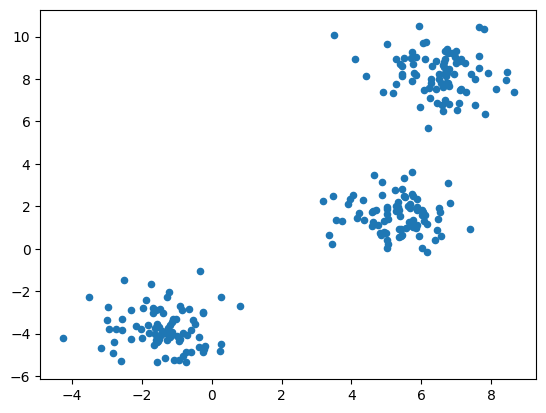

In [ ]:
###
X,y = make_blobs(n_samples = 250, n_features=2, centers=3, cluster_std=0.9, shuffle=True, random_state=231)
plt.scatter(X[:,0], X[:,1], s=20, marker='o')

In [ ]:
#DEAP

In [ ]:
size_chromosome  = X.shape[0]
K = 3
creator.create("FitnessMax", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("cluster_id", random.randint, 1, K) # from one to K clusters
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.cluster_id, size_chromosome)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, 500)
toolbox.register("evaluate", lambda W: fitness(W, K , X))
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=1, up=K, indpb=0.09)
toolbox.register("select", tools.selTournament, tournsize = 3) #change to rolloute wheel

def main():
    random.seed(1)
    CXPB, MUTPB, NGEN = 0.90, 0.09, 20000
    pop  = toolbox.population()  # create the initial population
    hof  = tools.HallOfFame(1) # keep the better individual in each generation
    stats = tools.Statistics(lambda ind: ind.fitness.values) #to keep statistics about population in each population
    # register statiticals functions of numpy library
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook  = algorithms.eaSimple(pop, toolbox, cxpb = CXPB, mutpb = MUTPB,
                                        ngen = NGEN, stats = stats,
                                        halloffame = hof , verbose = True)
    return hof, logbook

if __name__ == "__main__":
    best, log = main()
    print("The better fitness" ,best[0].fitness.values)
    print("solution" , best[0])

Se truncaron las últimas líneas 5000 del resultado de transmisión.
15003	446   	741.994	455.385	600.672	3046.34
15004	459   	704.92 	385.892	600.672	2876.96
15005	439   	736.071	434.06 	600.672	2938.86
15006	447   	715.356	427.665	600.672	3194.95
15007	444   	699.974	392.015	600.672	2924.6 
15008	460   	703.803	399.064	600.672	2864.15
15009	454   	746.091	469.501	600.672	3022.59
15010	449   	738.467	454.826	600.672	3071.47
15011	451   	720.923	417.283	600.672	3218.89
15012	445   	777.552	522.28 	600.672	3197.18
15013	473   	741.945	439.582	600.672	2903.38
15014	451   	777.086	509.56 	600.672	2910.97
15015	459   	758.922	479.363	600.672	3528.46
15016	447   	694.879	369.426	600.672	2870.06
15017	439   	782.567	501.159	600.672	2915.35
15018	458   	723.479	420.015	600.672	2874.84
15019	450   	772.895	505.472	600.672	3635.2 
15020	447   	711.828	403.194	600.672	3089.3 
15021	445   	705.092	380.617	600.672	2638.31
15022	449   	737.917	458.271	600.672	3311.76
15023	446   	752.217	489.719	600.

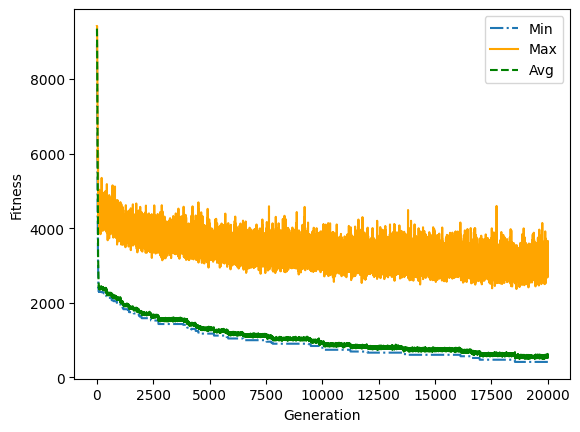

In [ ]:
plot(log)

In [ ]:
solution  = np.array(best[0])

In [ ]:
cluster_book = decode(solution, 3)

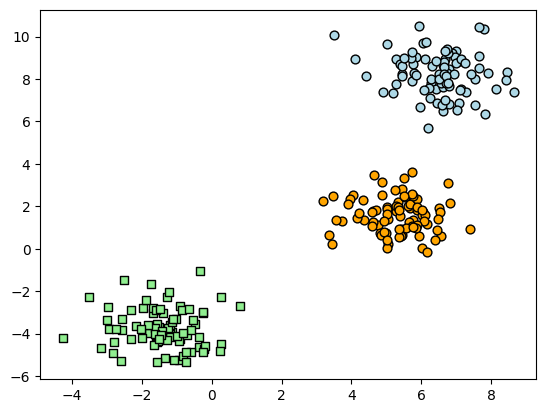

In [ ]:
plt.scatter(X[solution==1,0], X[solution==1,1], s=40, c='lightgreen', marker='s', edgecolors='black', label = 'cluster1')
plt.scatter(X[solution==2,0], X[solution==2,1], s=40, c='orange', marker='o', edgecolor='black', label='cluster2')
plt.scatter(X[solution==3,0], X[solution==3,1], s=40, c='lightblue', marker='o', edgecolor='black', label='acluster3')

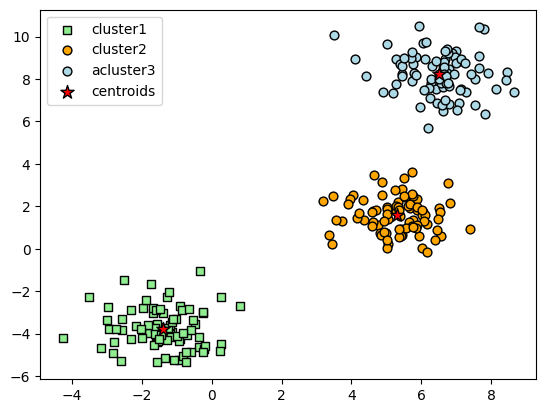

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3,
             init='random',
             n_init=12,
             max_iter=300,
             tol = 1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km==0,0], X[y_km==0,1], s=40, c='lightgreen', marker='s', edgecolors='black', label = 'cluster1')
plt.scatter(X[y_km==1,0], X[y_km==1,1], s=40, c='orange', marker='o', edgecolor='black', label='cluster2')
plt.scatter(X[y_km==2,0], X[y_km==2,1], s=40, c='lightblue', marker='o', edgecolor='black', label='acluster3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)

In [ ]:
print(km.inertia_)

409.73350755024575


In [ ]:
# Experimental results!!

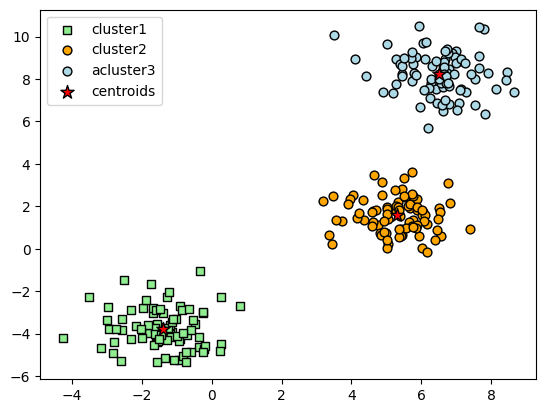

In [ ]:
# Define your initial centroids
initial_centroids = [computeCentroids(X,1, cluster_book),computeCentroids(X,2, cluster_book),computeCentroids(X,3, cluster_book)]

# Create KMeans instance
kmeans = KMeans(n_clusters=3, init=initial_centroids, n_init=1, random_state=42)
y_km = kmeans.fit_predict(X)
plt.scatter(X[y_km==0,0], X[y_km==0,1], s=40, c='lightgreen', marker='s', edgecolors='black', label = 'cluster1')
plt.scatter(X[y_km==1,0], X[y_km==1,1], s=40, c='orange', marker='o', edgecolor='black', label='cluster2')
plt.scatter(X[y_km==2,0], X[y_km==2,1], s=40, c='lightblue', marker='o', edgecolor='black', label='acluster3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)


In [ ]:
print(kmeans.inertia_)

409.73350755024575
